## Part one: Distribution of # employees in the office on a random day

For each simulated week:

    Each of nnn employees randomly selects 2 distinct office days (from 5).

    For each day, count how many employees chose that day.

    Aggregate across simulations to approximate the distribution.

    Plot a histogram

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simiulation of one week

In [2]:
import numpy as np

def officedays(n, random_state=None):
    rng = np.random.default_rng(random_state)
    workdays = np.zeros(5, dtype=int)
    for i in range(n):
        days = rng.permutation(5)[:2]
        workdays[days] += 1
    return workdays

### Repeating the simulation for x number of weeks

In [3]:
all_weeks = []
num_weeks = 100000
n=200
for i in range(num_weeks):
    all_weeks.append(officedays(n))
all_weeks = np.array(all_weeks)

In [4]:
all_weeks = np.array(all_weeks)
column_sums = all_weeks.sum(axis=0)
column_sums

array([8001200, 8004338, 8002136, 7995343, 7996983])

Text(0.5, 1.0, 'Total Office Attendance per Day Across Weeks')

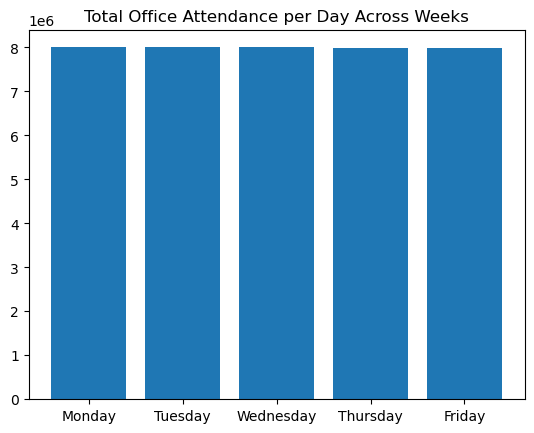

In [5]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
plt.bar(days, column_sums)
plt.title("Total Office Attendance per Day Across Weeks")

## Probability that two particular employees overlap ≥ 2 days

In [6]:
two_ppl_sim= []
for i in range(num_weeks):
    two_ppl_sim.append(officedays(2))
two_ppl_sim=np.array(two_ppl_sim)
two_ppl_sim

array([[1, 0, 1, 1, 1],
       [1, 1, 0, 2, 0],
       [0, 2, 1, 0, 1],
       ...,
       [0, 1, 1, 2, 0],
       [1, 0, 1, 0, 2],
       [1, 0, 2, 0, 1]])

In [9]:
overlap = 0
nonoverlap = 0
for x in np.nditer(two_ppl_sim):
    if x >=2: 
        overlap +=1
    else :
        nonoverlap +=1
        
print("The collegues met on" , overlap , "day and didnt meet on", nonoverlap, "days at the office out of", num_weeks,"weeks")

odds= overlap / (nonoverlap+overlap)
odds

The collegues met on 79734 day and didnt meet on 420266 days at the office out of 100000 weeks


0.159468